In [94]:
# Written by Herman van Haagen, https://www.linkedin.com/in/hermanvanhaagen/

In [95]:
import numpy as np
import matplotlib.pyplot as plt

We will be using the sigmoid activation function and its derivatie

In [96]:
# We abreviate the sigmoid to SM to make the backpropagation more clear. 
def SM(x):
    y = 1/(1 + np.exp(-x))
    return y

In [97]:
# We abreviate the sigmoid prime to SMP to make the backpropagation more clear.
def SMP(y):
    return y*(1 - y)

### Creating XOR data

In [98]:
# Create dummy data. 100 instances for each class
f1 = []
f1 = np.append(np.random.normal(-3,1,100),f1)
f1 = np.append(np.random.normal(3,1,100),f1)
f1 = np.append(np.random.normal(-3,1,100),f1)
f1 = np.append(np.random.normal(3,1,100),f1)
f2 = []
#x1 = np.append(np.random.normal(-1,1,100),np.random.normal(1,1,100),np.random.normal(-1,1,100))
f2 = np.append(np.random.normal(-3,1,100),f2)
f2 = np.append(np.random.normal(-3,1,100),f2)
f2 = np.append(np.random.normal(3,1,100),f2)
f2 = np.append(np.random.normal(3,1,100),f2)

# Create labels for the two classes
labels = []

labels = np.append(np.zeros(100),labels)
labels = np.append(np.ones(100),labels)
labels = np.append(np.ones(100),labels)
labels = np.append(np.zeros(100),labels)

# Shuffle de labels en data. This is needed for proper training
sample = list(range(0, 400))
np.random.shuffle(sample)
f1 = f1[sample]
f2 = f2[sample]
labels = labels[sample]

f1 = (f1-min(f1))/(max(f1)-min(f1))
f2 = (f2-min(f2))/(max(f2)-min(f2))

Check if the XOR data looks OK. 

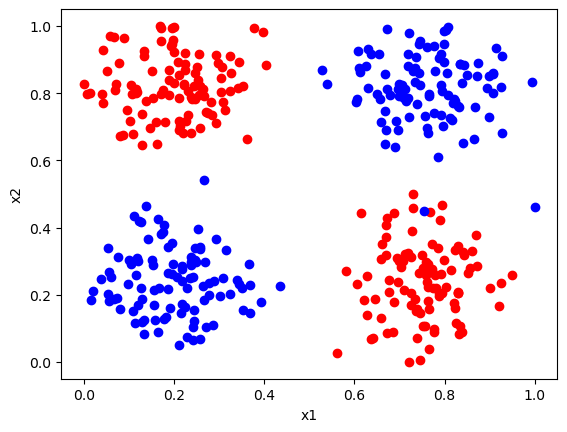

In [99]:
# Plot the XOR data
indpos = np.where(labels==1)
indneg = np.where(labels==0)
plt.scatter(f1[indpos],f2[indpos],color="red")
plt.scatter(f1[indneg],f2[indneg],color="blue")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Initialization of parameters

In [100]:
# We initialize the learning rate and the number of epochs. 
lr = 0.05
epochs = 1000

In [101]:
# We Initialize the weights as biases in the network. We do this between [-0.5, 0.5]
# Here is where we start using matrices!!!

w = np.random.rand(2,2)-0.5
b = np.random.rand(2,1)
v = np.random.rand(1,2)-0.5
b3 = np.random.rand()-0.5

In [102]:
# Keep track of the learning process
monitor_error = []

### Training the XOR neural net with backpropagation

In [103]:
for epoch in range(epochs):
    
    sum_error = 0
    for n in range(400): # size of dataset 
        
        # Select one instance of the data (Stochastic gradient descent)
        x = np.array([f1[n],f2[n]])
        x = x[ :,np.newaxis]
        label = labels[n] 
            
        # The forward pass
        y = np.matmul(w,x) + b # matrix multiplication
        z = SM(y)        
        y3 = np.matmul(v,z) + b3 # matrix multiplication
        O  = SM(y3)
        
        error = O-label
        
        sum_error += error[0][0]**2
        
        # backpropagation
        # Note the transpose of the matrix or vector
        # the * operator is basically the Hadamard product
        delta_v  = error*SMP(O)*np.transpose(z)
        delta_b3 = error*SMP(O)
    
        delta_w = error*SMP(O)*np.transpose(v)*SMP(z)*np.transpose(x)
        delta_b = error*SMP(O)*np.transpose(v)*SMP(z)
        
        v = v - lr*delta_v
        w = w - lr*delta_w 
        b = b - lr*delta_b
        b3 = b3 - lr*delta_b3
        
    monitor_error += [sum_error/400]

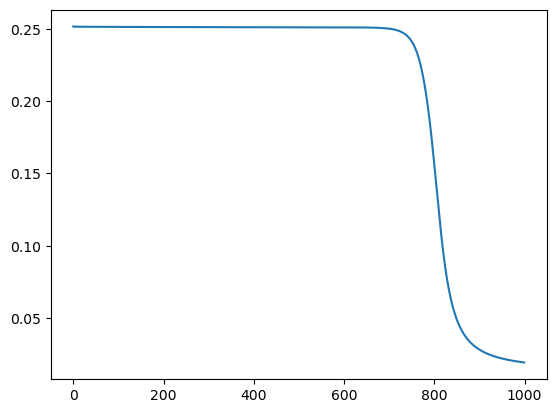

In [104]:
plt.plot(monitor_error)

### Plot the two discriminant lines
The two lines show how the XOR problem can be solved using this neural network

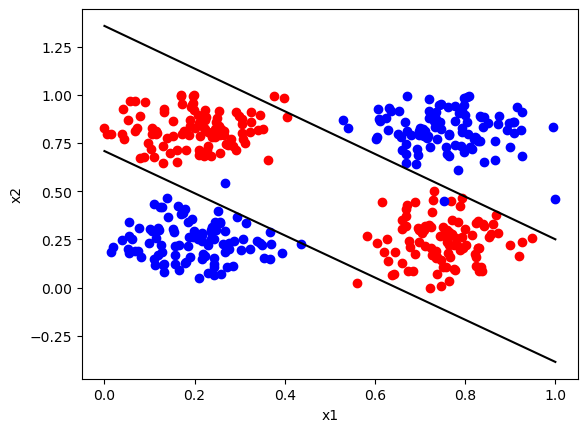

In [105]:
# Plot the XOR data. 
indpos = np.where(labels==1)
indneg = np.where(labels==0)
plt.scatter(f1[indpos],f2[indpos],color="red")
plt.scatter(f1[indneg],f2[indneg],color="blue")
plt.xlabel('x1')
plt.ylabel('x2')

# Draw the decision boundaries
rc = -w[0,0]/w[0,1]
bias = -b[0]/w[0,1]
x = np.linspace(0,1,num=100)
y = rc*x+bias
plt.plot(x,y,color="black")

rc = -w[1,0]/w[1,1]
bias = -b[1]/w[1,1]
x = np.linspace(0,1,num=100)
y = rc*x+bias
plt.plot(x,y,color="black")

plt.show()